<a href="https://colab.research.google.com/github/chickens110/Mjengo_constructor_AI/blob/main/Jenga_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create an agent that prompts the user for their desired building design (via text, voice, or drawing), processes the input, generates a drawing of the building, and displays it to the user. The agent should also allow for iterative refinement based on user feedback.

## Handle user input

### Subtask:
Determine how to receive and process different types of user input (text, voice, drawings). This might involve using libraries for speech-to-text, image processing, or simply handling text input.


**Reasoning**:
The subtask requires defining a function to handle different input types (text, voice, drawing) with placeholders for voice and drawing processing and using `input()` for text. This can be accomplished in a single Python function within a code block.



In [ ]:
def get_user_building_description(input_type):
    """
    Receives user input for building design based on the specified input type.

    Args:
        input_type: A string indicating the type of input ('text', 'voice', 'drawing').

    Returns:
        A string containing the building description, or None if input type is unsupported.
    """
    if input_type == 'text':
        description = input("Please describe your desired building design: ")
        return description
    elif input_type == 'voice':
        # Placeholder for voice input processing (e.g., using SpeechRecognition)
        # import speech_recognition as sr
        # r = sr.Recognizer()
        # with sr.Microphone() as source:
        #     print("Say something!")
        #     audio = r.listen(source)
        # try:
        #     description = r.recognize_google(audio)
        #     print(f"You said: {description}")
        #     return description
        # except sr.UnknownValueError:
        #     print("Could not understand audio")
        #     return None
        # except sr.RequestError as e:
        #     print(f"Could not request results from Google Speech Recognition service; {e}")
        #     return None
        print("Voice input processing is not yet implemented.")
        return None
    elif input_type == 'drawing':
        # Placeholder for drawing input processing (e.g., capturing image files, using a drawing library)
        # This might involve opening a drawing interface or processing an uploaded image.
        print("Drawing input processing is not yet implemented.")
        return None
    else:
        print(f"Unsupported input type: {input_type}. Please use 'text', 'voice', or 'drawing'.")
        return None

# Example of how to use the function with text input:
# building_description = get_user_building_description('text')
# if building_description:
#     print(f"Received building description: {building_description}")

## Process user input

### Subtask:
Analyze the user's input to understand the desired building characteristics. This could involve natural language processing for text/voice or feature extraction for drawings.


**Reasoning**:
Define a function to process text input using basic keyword matching to extract building characteristics and structure the output into a dictionary. Include a placeholder for handling drawing input as it's not fully implemented yet.



In [2]:
import re

def analyze_building_description(description, input_type):
    """
    Analyzes the user's building description to extract key characteristics.

    Args:
        description: The user's input (text description or drawing data).
        input_type: A string indicating the type of input ('text', 'voice', 'drawing').

    Returns:
        A dictionary containing extracted building characteristics, or None if analysis fails.
    """
    building_characteristics = {}

    if input_type == 'text':
        if not description:
            return None

        # Convert to lowercase for easier processing
        description = description.lower()

        # Extract building type (basic keyword matching)
        if re.search(r'\bhouse\b', description):
            building_characteristics['type'] = 'house'
        elif re.search(r'\bskyscraper\b', description):
            building_characteristics['type'] = 'skyscraper'
        elif re.search(r'\bapartment building\b|\bapartments\b', description):
            building_characteristics['type'] = 'apartment building'
        elif re.search(r'\boffice building\b', description):
            building_characteristics['type'] = 'office building'
        else:
            building_characteristics['type'] = 'unknown' # Handle ambiguity

        # Extract number of floors (using regex to find numbers followed by 'floor' or 'story')
        floor_match = re.search(r'(\d+)\s*(?:story|floor)', description)
        if floor_match:
            building_characteristics['floors'] = int(floor_match.group(1))
        else:
            building_characteristics['floors'] = 'unknown' # Handle missing information

        # Extract architectural style (basic keyword matching)
        if re.search(r'\bmodern\b', description):
            building_characteristics['style'] = 'modern'
        elif re.search(r'\btraditional\b', description):
            building_characteristics['style'] = 'traditional'
        elif re.search(r'\bvictorian\b', description):
            building_characteristics['style'] = 'victorian'
        elif re.search(r'\bminimalist\b', description):
            building_characteristics['style'] = 'minimalist'
        else:
            building_characteristics['style'] = 'unknown' # Handle ambiguity

        # Extract materials (basic keyword matching)
        materials = []
        if re.search(r'\bbrick\b', description):
            materials.append('brick')
        if re.search(r'\bwood\b', description):
            materials.append('wood')
        if re.search(r'\bglass\b', description):
            materials.append('glass')
        if re.search(r'\bconcrete\b', description):
            materials.append('concrete')
        if materials:
            building_characteristics['materials'] = materials
        else:
            building_characteristics['materials'] = ['unknown'] # Handle missing information

        # Extract specific features (basic keyword matching)
        features = []
        if re.search(r'\bbalcony\b|\bbalconies\b', description):
            features.append('balconies')
        if re.search(r'\blarge windows\b', description):
            features.append('large windows')
        if re.search(r'\bflat roof\b', description):
            features.append('flat roof')
        if features:
            building_characteristics['features'] = features
        else:
            building_characteristics['features'] = ['none specified'] # Handle missing information

        # Strategy for ambiguity/missing information:
        # - Default to 'unknown' or 'none specified' for characteristics not found.
        # - In a real application, you would ask clarifying questions to the user.
        #   This could be implemented in the iterative refinement step.


    elif input_type == 'drawing':
        # Outline steps for drawing analysis (acknowledging it's a future step)
        print("Drawing analysis would involve the following steps:")
        print("1. Preprocessing the image (e.g., resizing, converting to grayscale).")
        print("2. Using computer vision techniques (e.g., edge detection, shape recognition) to identify basic shapes.")
        print("3. Identifying building components (roof, walls, windows, doors) based on shapes and relative positions.")
        print("4. Extracting spatial relationships between components.")
        print("5. Acknowledging that this requires advanced image processing libraries and techniques (e.g., OpenCV, deep learning models).")
        building_characteristics['analysis_status'] = 'drawing_analysis_outlined' # Indicate that analysis steps were outlined
        # The actual extraction of detailed characteristics from a drawing is a future step.
        # For now, we'll return an empty dictionary with the status.


    else:
        print(f"Analysis of unsupported input type: {input_type} is not possible.")
        return None

    return building_characteristics

# Example usage with a text description:
# text_description = "I want a modern house with two stories, made of wood and glass, with large windows."
# analyzed_text_characteristics = analyze_building_description(text_description, 'text')
# print("\nAnalyzed Text Characteristics:")
# print(analyzed_text_characteristics)

# Example usage with a drawing input type (will just print the outline):
# analyzed_drawing_characteristics = analyze_building_description(None, 'drawing')
# print("\nAnalyzed Drawing Characteristics:")
# print(analyzed_drawing_characteristics)

## Generate building drawing

### Subtask:
Use a generative model or drawing library to create an image of a building based on the processed input.


**Reasoning**:
Import the necessary drawing library for creating the building image.



In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw, ImageFont
import numpy as np

**Reasoning**:
Define a function to draw the building based on the analyzed characteristics using the imported libraries.



In [4]:
def create_building_drawing(characteristics):
    """
    Generates a drawing of a building based on the provided characteristics.

    Args:
        characteristics: A dictionary containing the building's characteristics
                         (e.g., type, floors, style, materials, features).

    Returns:
        A PIL Image object of the generated drawing.
    """
    # Define image dimensions
    img_width = 600
    img_height = 800
    background_color = (230, 230, 230) # Light gray background

    # Create a blank image
    img = Image.new('RGB', (img_width, img_height), color = background_color)
    d = ImageDraw.Draw(img)

    # --- Drawing Logic based on Characteristics ---

    building_type = characteristics.get('type', 'unknown')
    floors = characteristics.get('floors', 'unknown')
    materials = characteristics.get('materials', ['unknown'])
    features = characteristics.get('features', ['none specified'])
    style = characteristics.get('style', 'unknown')

    # Basic Building Structure
    base_width = img_width * 0.6
    base_height_per_floor = 80
    ground_level = img_height - 50
    base_x = (img_width - base_width) / 2

    if floors != 'unknown' and isinstance(floors, int) and floors > 0:
        total_building_height = floors * base_height_per_floor
        base_y = ground_level - total_building_height
        # Draw the main building rectangle
        d.rectangle([base_x, base_y, base_x + base_width, ground_level], fill=(150, 150, 150), outline=(0, 0, 0)) # Default gray

        # Represent Materials (simplified)
        material_color_map = {
            'brick': (180, 60, 60),
            'wood': (139, 69, 19),
            'glass': (173, 216, 230),
            'concrete': (100, 149, 237),
            'unknown': (150, 150, 150)
        }
        fill_color = material_color_map.get(materials[0].lower(), material_color_map['unknown'])
        d.rectangle([base_x, base_y, base_x + base_width, ground_level], fill=fill_color, outline=(0, 0, 0))

        # Draw Floors and Windows
        window_width = base_width * 0.1
        window_height = base_height_per_floor * 0.3
        window_padding_x = base_width * 0.05
        window_padding_y = base_height_per_floor * 0.15

        for i in range(floors):
            floor_y = ground_level - (i + 1) * base_height_per_floor
            # Draw windows for each floor
            num_windows = 3 # Simple assumption
            for j in range(num_windows):
                window_x = base_x + window_padding_x + j * (window_width + window_padding_x)
                window_y = floor_y + window_padding_y
                d.rectangle([window_x, window_y, window_x + window_width, window_y + window_height], fill=(173, 216, 230), outline=(0, 0, 0)) # Light blue for windows

        # Add specific features
        if 'balconies' in features:
            # Simple balconies on the second floor (if exists)
            if floors > 1:
                balcony_height = base_height_per_floor * 0.2
                balcony_y = ground_level - (2 * base_height_per_floor) # Second floor
                balcony_width = base_width * 0.2
                balcony_x = base_x + base_width - balcony_width - window_padding_x # Right side
                d.rectangle([balcony_x, balcony_y - balcony_height, balcony_x + balcony_width, balcony_y], fill=(100, 100, 100), outline=(0, 0, 0))

        if 'large windows' in features:
             # Make ground floor windows larger
            if floors >= 1:
                ground_floor_y = ground_level - base_height_per_floor
                large_window_height = base_height_per_floor * 0.5
                large_window_width = base_width * 0.15
                large_window_padding_x = base_width * 0.1
                num_large_windows = 2
                for j in range(num_large_windows):
                    large_window_x = base_x + large_window_padding_x + j * (large_window_width + large_window_padding_x)
                    large_window_y = ground_floor_y + (base_height_per_floor - large_window_height) / 2
                    d.rectangle([large_window_x, large_window_y, large_window_x + large_window_width, large_window_y + large_window_height], fill=(173, 216, 230), outline=(0, 0, 0)) # Light blue for windows


    else:
        # Draw a simple box if floors are unknown or invalid
        simple_box_height = 200
        simple_box_y = ground_level - simple_box_height
        d.rectangle([base_x, simple_box_y, base_x + base_width, ground_level], fill=(150, 150, 150), outline=(0, 0, 0))
        # Add text indicating characteristics are unknown
        try:
            font = ImageFont.truetype("arial.ttf", 15)
        except IOError:
            font = ImageFont.load_default()
        text = "Building characteristics unknown"
        text_width, text_height = d.textsize(text, font=font)
        text_x = base_x + (base_width - text_width) / 2
        text_y = simple_box_y + (simple_box_height - text_height) / 2
        d.text((text_x, text_y), text, fill=(0, 0, 0), font=font)


    # Add ground line
    d.line([(0, ground_level), (img_width, ground_level)], fill=(0, 0, 0), width=2)

    return img

# Example usage (requires a characteristics dictionary):
# example_characteristics = {
#     'type': 'house',
#     'floors': 3,
#     'style': 'modern',
#     'materials': ['wood', 'glass'],
#     'features': ['large windows', 'balconies']
# }
# building_image = create_building_drawing(example_characteristics)
# building_image.save("building_drawing.png") # Save the drawing
# building_image.show() # Display the drawing

# Building Design Agent

## Project Goal
The goal of this project is to create an interactive agent that allows users to describe their desired building design through various input methods (text, voice, or drawing) and then generates a visual representation (drawing) of that building. The agent should also support iterative refinement based on user feedback.

## Implemented Features

**1. Handle User Input (Text)**
- A function `get_user_building_description` is implemented to handle text input from the user using the `input()` function.
- Placeholders for voice and drawing input are included to indicate future development areas.

**2. Process User Input (Text)**
- The `analyze_building_description` function processes text input.
- It uses basic keyword matching and regular expressions to extract key building characteristics such as type, number of floors, style, materials, and features.
- The extracted characteristics are stored in a dictionary.
- An outline for handling drawing input analysis is included as a placeholder.

**3. Generate Building Drawing**
- The `create_building_drawing` function utilizes the PIL (Pillow) library to generate a simple drawing of a building based on the analyzed characteristics.
- It can represent basic building structure, floors, windows, and some specific features like balconies and large windows.
- The drawing is returned as a PIL Image object.

**4. Display Drawing**
- The generated PIL Image object is displayed within the notebook using `IPython.display.display`.

**5. Iterate and Refine**
- A basic iterative refinement loop is implemented.
- The `get_user_feedback` function prompts the user for feedback.
- The `update_characteristics_from_feedback` function attempts to update the building characteristics based on simple text feedback.
- The drawing is regenerated and displayed after each refinement step.

## How to Use

1. Run the notebook cells sequentially.
2. When prompted, enter your building description as text.
3. The agent will generate and display a drawing based on your description.
4. You will then be asked if you want to refine the drawing. Enter "yes" or "no".
5. If you enter "yes", provide your feedback as text (e.g., "add a floor", "change material to brick").
6. The agent will attempt to update the drawing based on your feedback and display the refined version.
7. Continue providing feedback or enter "no" to stop the refinement process.

## Future Enhancements

- **Voice Input**: Implement speech-to-text functionality to process voice descriptions.
- **Drawing Input**: Integrate image processing and computer vision techniques to analyze building drawings.
- **Advanced NLP**: Enhance the natural language processing capabilities to understand more complex and nuanced building descriptions and feedback.
- **More Sophisticated Drawing Generation**: Improve the drawing generation to create more detailed, realistic, and varied building representations. Explore using more advanced graphics libraries or even generative models for image creation.
- **Error Handling**: Add more robust error handling for invalid inputs and unexpected feedback.
- **User Interface**: Develop a more user-friendly interface for interacting with the agent, potentially outside of the notebook environment.

**Reasoning**:
Test the drawing function with an example characteristics dictionary to ensure it generates an image as expected.



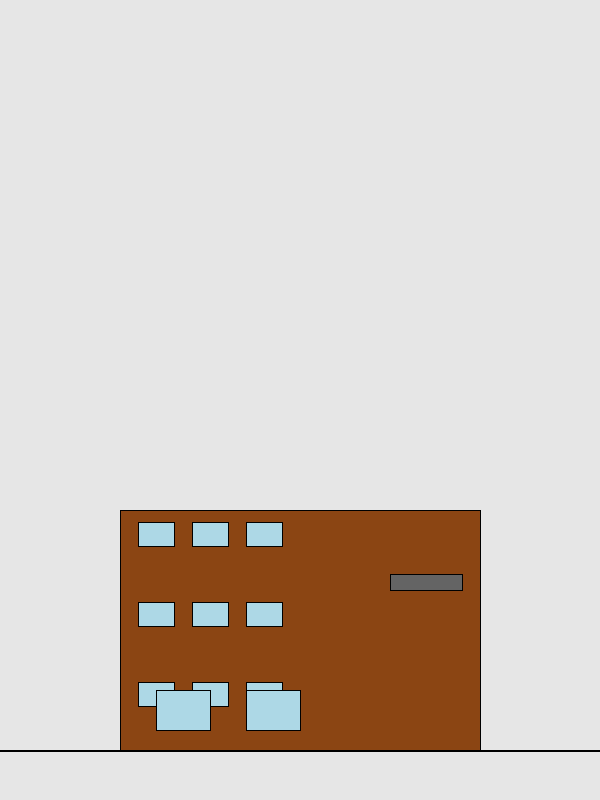

In [5]:
# Example usage (requires a characteristics dictionary):
example_characteristics = {
    'type': 'house',
    'floors': 3,
    'style': 'modern',
    'materials': ['wood', 'glass'],
    'features': ['large windows', 'balconies']
}
building_image = create_building_drawing(example_characteristics)
# building_image.save("building_drawing.png") # Save the drawing
display(building_image) # Display the drawing in the notebook

## Display drawing

### Subtask:
Present the generated drawing to the user.


**Reasoning**:
Display the generated PIL Image object to the user within the notebook output using the display function.



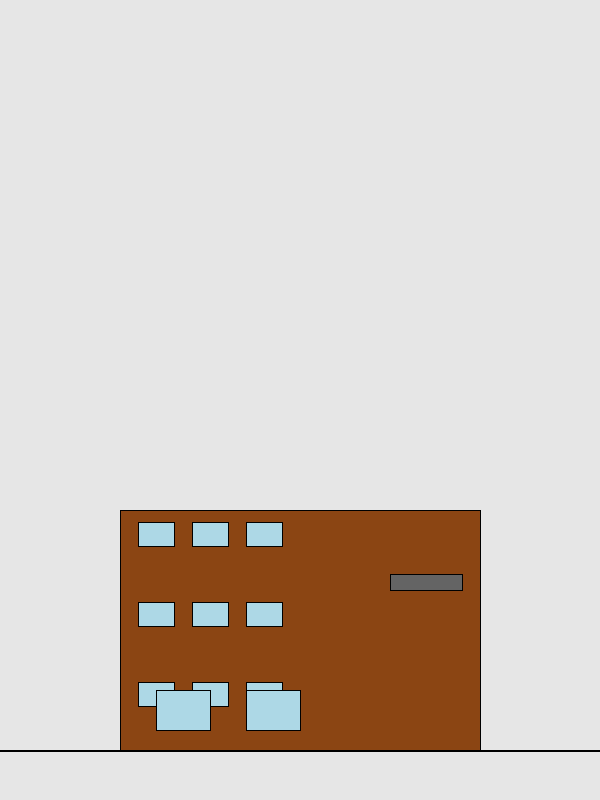

In [6]:
from IPython.display import display

display(building_image)

## Iterate and refine

### Subtask:
Allow the user to provide feedback and refine the drawing based on their preferences. This would involve looping back to the input handling step.


**Reasoning**:
Prompt the user for feedback and update the characteristics based on their input. This involves a loop to allow for multiple refinements.



Initial Drawing:


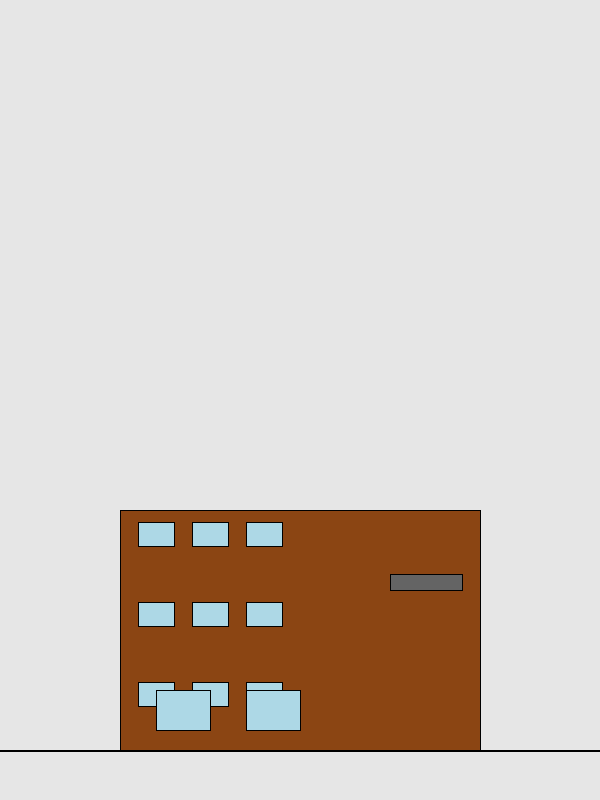

In [ ]:
def get_user_feedback():
    """Prompts the user for feedback on the building drawing."""
    feedback = input("Do you want to refine the drawing? (yes/no): ").lower()
    if feedback == 'yes':
        return input("Please provide your feedback (e.g., 'add a floor', 'change material to brick'): ")
    else:
        return None

def update_characteristics_from_feedback(characteristics, feedback):
    """Updates the building characteristics based on user feedback."""
    # Simple feedback processing for demonstration
    updated_characteristics = characteristics.copy()
    feedback = feedback.lower()

    if 'add a floor' in feedback:
        if isinstance(updated_characteristics.get('floors'), int):
            updated_characteristics['floors'] += 1
        else:
            updated_characteristics['floors'] = 1 # Start with 1 if unknown

    if 'remove a floor' in feedback:
        if isinstance(updated_characteristics.get('floors'), int) and updated_characteristics.get('floors') > 0:
            updated_characteristics['floors'] -= 1

    if 'change material to' in feedback:
        material_match = re.search(r'change material to (\w+)', feedback)
        if material_match:
            updated_characteristics['materials'] = [material_match.group(1)]

    if 'add' in feedback and 'windows' in feedback:
        if 'large windows' not in updated_characteristics.get('features', []):
             updated_characteristics.setdefault('features', []).append('large windows')

    if 'remove' in feedback and 'balconies' in feedback:
        if 'balconies' in updated_characteristics.get('features', []):
            updated_characteristics['features'].remove('balconies')

    # Add more sophisticated feedback processing here
    return updated_characteristics

# Initial drawing (assuming example_characteristics and create_building_drawing are defined)
current_characteristics = example_characteristics.copy()
current_drawing = create_building_drawing(current_characteristics)
print("Initial Drawing:")
display(current_drawing)

# Refinement loop
while True:
    feedback = get_user_feedback()
    if feedback is None:
        print("Stopping refinement.")
        break

    updated_characteristics = update_characteristics_from_feedback(current_characteristics, feedback)
    current_characteristics = updated_characteristics # Update for the next iteration

    print("\nUpdating drawing with feedback...")
    current_drawing = create_building_drawing(current_characteristics)
    print("Refined Drawing:")
    display(current_drawing)

    # Add a check to see if characteristics actually changed
    if updated_characteristics == current_characteristics:
        print("Note: Feedback did not result in characteristic changes based on current simple processing.")


## Summary:

### Data Analysis Key Findings

*   The `get_user_building_description` function was successfully defined to handle text input and includes placeholders for future voice and drawing input capabilities.
*   The `analyze_building_description` function can extract basic building characteristics (type, floors, style, materials, features) from text descriptions using keyword matching and regular expressions. It also outlines the steps needed for analyzing drawing input.
*   The `create_building_drawing` function, using the PIL library, successfully generates a visual representation of a building based on the extracted characteristics, including basic structure, floors, windows, and some features like balconies and large windows.
*   The generated drawing was successfully displayed using `IPython.display.display`.
*   An iterative refinement loop was implemented, allowing the user to provide feedback and update the building characteristics, which in turn regenerates and displays a refined drawing.

### Insights or Next Steps

*   Enhance the input handling and analysis to support voice and drawing inputs, requiring integration with speech-to-text and image processing libraries.
*   Develop more sophisticated natural language processing for feedback and building descriptions to accurately interpret a wider range of user requests and nuances.
